This notebook is used to compare multiple training runs.

### Load libraries

In [1]:
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
from tqdm.contrib.concurrent import process_map

from go_attack import game_info

### Load run data

In [2]:
def get_run_df(data_dir: str) -> pd.DataFrame:
    sgf_paths = game_info.find_sgf_files(f"{data_dir}/selfplay")
    raw_sgf_strs = game_info.read_and_concat_all_files(sgf_paths)

    game_infos: List[game_info.GameInfo] = process_map(
        game_info.parse_game_info,
        raw_sgf_strs,
        max_workers=64,
        chunksize=50,
    )

    df = pd.DataFrame([gi.to_dict() for gi in game_infos])
    print("gtypes:", df.gtype.unique())
    print("Number of cleanup games:", (df.gtype == "cleanuptraining").sum())

    # Filter to only normal games
    df = df[df.gtype == "normal"]
    print("Fraction continuation:    ", df.is_continuation.mean())
    print("Fraction used_initial_pos:", df.used_initial_position.mean())
    print("max(init_turn_num)       :", df.init_turn_num.max())

    return df  # type: ignore

In [3]:
dfv2 = get_run_df("/nas/ucb/tony/go-attack/training/emcts1-v2/cp127-vis32")
dfv3 = get_run_df("/nas/ucb/tony/go-attack/training/emcts1-v3/cp127-vis32")
dfv4 = get_run_df("/nas/ucb/tony/go-attack/training/emcts1-v4/cp127-vis32")
dfv4_apt = get_run_df("/nas/ucb/tony/go-attack/training/emcts1-v4/cp127-vis32-apt")

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/384819 [00:00<?, ?it/s]

gtypes: ['normal']
Number of cleanup games: 0
Fraction continuation:     0.0
Fraction used_initial_pos: 0.0
max(init_turn_num)       : 0


  0%|          | 0/232 [00:00<?, ?it/s]

  0%|          | 0/797504 [00:00<?, ?it/s]

gtypes: ['normal']
Number of cleanup games: 0
Fraction continuation:     0.0
Fraction used_initial_pos: 0.0
max(init_turn_num)       : 0


  0%|          | 0/177 [00:00<?, ?it/s]

  0%|          | 0/627631 [00:00<?, ?it/s]

gtypes: ['normal']
Number of cleanup games: 0
Fraction continuation:     0.0
Fraction used_initial_pos: 0.0
max(init_turn_num)       : 0


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/68456 [00:00<?, ?it/s]

gtypes: ['normal']
Number of cleanup games: 0
Fraction continuation:     0.0
Fraction used_initial_pos: 0.0
max(init_turn_num)       : 0


### Plots

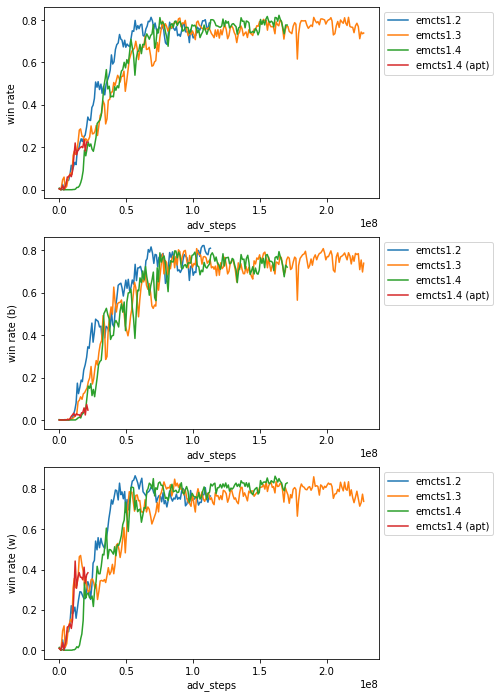

In [4]:
def plot_win_rate(
    df: pd.DataFrame,
    drop_last: int = 2,
    **plot_kwargs,
):
    assert drop_last > 0
    df19 = df[df.board_size == 19]
    df19.groupby("adv_steps").mean().adv_win.iloc[:-drop_last].plot(**plot_kwargs)

plt.figure(figsize=(6, 12))

plt.subplot(3, 1, 1)
plt.ylabel("win rate")
plot_win_rate(dfv2, label="emcts1.2")
plot_win_rate(dfv3, label="emcts1.3")
plot_win_rate(dfv4, label="emcts1.4")
plot_win_rate(dfv4_apt, label="emcts1.4 (apt)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

for i, adv_color in enumerate(("b", "w")):
    plt.subplot(3, 1, 2 + i)
    plt.ylabel(f"win rate ({adv_color})")
    plot_win_rate(dfv2[dfv2.adv_color == adv_color], label="emcts1.2")
    plot_win_rate(dfv3[dfv3.adv_color == adv_color], label="emcts1.3")
    plot_win_rate(dfv4[dfv4.adv_color == adv_color], label="emcts1.4")
    plot_win_rate(dfv4_apt[dfv4_apt.adv_color == adv_color], label="emcts1.4 (apt)")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
